# Compound properties

## Initialization

NIST Chemistry WebBook compound can be initialized via NIST Compound ID, CAS Registry Number, or InChI string:

In [1]:
import nistchempy as nist

X = nist.get_compound('C632053')
X

NistCompound(ID=C632053)

In [2]:
X = nist.get_compound('632-05-3')
X

NistCompound(ID=C632053)

In [3]:
X = nist.get_compound('InChI=1S/C4H7Br3/c1-3(6)4(7)2-5/h3-4H,2H2,1H3')
X

NistCompound(ID=C632053)

If there are no compound with given identifier in the NIST Chemistry WebBook database, `nist.get_compound` will return `None`. The same result will occur if multiple substances correspond to the given InChI.

The other way of compound initialization is to run the search and load found compounds (see the **Basic Search** section of the CookBook).

## Properties

The `nist.compound.NistCompound` object contains information extracted from the NIST Chemistry WebBook's compound web page. It can be divided into three groups:
  - **Basic properties** — properties which are already extracted from the compound web page:
      - `ID`: NIST Compound ID;
      - `name`: chemical name;
      - `synonyms`: synonyms;
      - `formula`: chemical formula;
      - `mol_weight`: molecular weigth;
      - `inchi` / `inchi_key`: InChI / InChIKey strings;
      - `cas_rn`: CAS Registry Number.
  - **Reference properties** — dictionaries {property name => URL}. There are four subgroups:
      - `mol_refs`: molecular properties, which are 2D and 3D MOL-files;
      - `data_refs`: WebBook properties, which are stored in NIST Chemistry WebBook;
      - `nist_public_refs`: other properties, which are stored in public NIST websites;
      - `nist_subscription_refs`: other properties, which are stored in paid NIST websites.
  - **Extracted properties** — properties extracted from the URLs provided by **reference properties**:
      - `mol2D` / `mol3D`: text blocks of 2D / 3D MOL-files;
      - `ir_specs` / `thz_specs` / `ms_specs` / `uv_specs`: JDX-formatted text blocks of IR / THz / MS / UV spectra.

In [4]:
# anthracene example
s = nist.run_search('anthracene', 'name')
X = s.compounds[0]
X.__dict__

{'ID': 'C120127',
 'name': 'Anthracene',
 'synonyms': ['Anthracin',
  'Green Oil',
  'Paranaphthalene',
  'Tetra Olive N2G',
  'Anthracene oil',
  'p-Naphthalene',
  'Anthracen',
  'Coal tar pitch volatiles:anthracene',
  'Sterilite hop defoliant'],
 'formula': 'C14 H10',
 'mol_weight': 178.2292,
 'inchi': 'InChI=1S/C14H10/c1-2-6-12-10-14-8-4-3-7-13(14)9-11(12)5-1/h1-10H',
 'inchi_key': 'MWPLVEDNUUSJAV-UHFFFAOYSA-N',
 'cas_rn': '120-12-7',
 'mol_refs': {'mol2D': 'https://webbook.nist.gov/cgi/cbook.cgi?Str2File=C120127',
  'mol3D': 'https://webbook.nist.gov/cgi/cbook.cgi?Str3File=C120127'},
 'data_refs': {'cTG': 'https://webbook.nist.gov/cgi/cbook.cgi?ID=C120127&Units=SI&Mask=1#Thermo-Gas',
  'cTC': 'https://webbook.nist.gov/cgi/cbook.cgi?ID=C120127&Units=SI&Mask=2#Thermo-Condensed',
  'cTP': 'https://webbook.nist.gov/cgi/cbook.cgi?ID=C120127&Units=SI&Mask=4#Thermo-Phase',
  'cTR': 'https://webbook.nist.gov/cgi/cbook.cgi?ID=C120127&Units=SI&Mask=8#Thermo-React',
  'cSO': 'https://webboo

## MOL-files

To load MOL-files, one can use `get_mol2D`, `get_mol3D`, or `get_molfiles` methods:

In [5]:
X.get_molfiles()
X.mol2D is None, X.mol3D is None

(False, False)

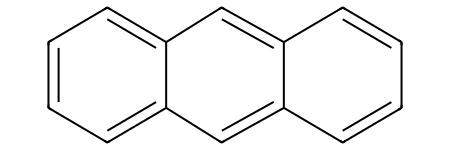

In [6]:
from rdkit import Chem

mol = Chem.MolFromMolBlock(X.mol2D)
mol

## Spectra

To load spectra, one can use `get_ir_spectra`, `get_thz_spectra`, `get_ms_spectra`, `get_uv_spectra`, and `get_all_spectra` methods:

In [7]:
X.ir_specs, X.thz_specs, X.ms_specs, X.uv_specs

([], [], [], [])

In [8]:
X.get_ms_spectra()
X.ir_specs, X.thz_specs, X.ms_specs, X.uv_specs

([], [], [Spectrum(C120127, Mass spectrum #0)], [])

Spectrum object contains JDX-formatted text block of the spectrum which includes both meta-information and spectral data:

In [9]:
ms = X.ms_specs[0]
print(ms.jdx_text)

##TITLE=Anthracene
##JCAMP-DX=4.24
##DATA TYPE=MASS SPECTRUM
##ORIGIN=Japan AIST/NIMC Database- Spectrum MS-NW- 132
##OWNER=NIST Mass Spectrometry Data Center
Collection (C) 2014 copyright by the U.S. Secretary of Commerce
on behalf of the United States of America. All rights reserved.
##CAS REGISTRY NO=120-12-7
##$NIST MASS SPEC NO=228201
##MOLFORM=C14 H10
##MW=178
##$NIST SOURCE=MSDC
##XUNITS=M/Z
##YUNITS=RELATIVE INTENSITY
##XFACTOR=1
##YFACTOR=1
##FIRSTX=27
##LASTX=181
##FIRSTY=20
##MAXX=181
##MINX=27
##MAXY=9999
##MINY=10
##NPOINTS=62
##PEAK TABLE=(XY..XY)
27,20 28,10 38,30 39,109
50,129 51,129 52,30 61,40
62,129 63,289 64,20 65,20
69,20 73,10 74,219 75,299
76,619 77,80 78,10 83,50
85,30 86,99 87,169 88,439
89,759 90,10 98,119 99,90
100,50 101,50 102,60 110,40
111,50 113,60 114,20 115,50
122,40 123,20 124,20 125,50
126,149 127,60 128,80 137,30
138,30 139,209 140,80 149,70
150,419 151,629 152,689 153,80
163,50 164,20 174,129 175,199
176,1409 177,799 178,9999 179,1569
180,149 181,30

Spectra of the given compound can be saved to the given directory via `save_ir_spectra`, `save_ir_spectra`, `save_ir_spectra`, `save_ir_spectra`, `save_all_spectra` methods of the `nist.compound.NistCompound` object. To save the specific spectrum, one can use the `save` method of the `nist.compound.Spectrum` object.